**K-Means Clustering**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")


**Loading of Datasets**

In [8]:
iris=load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df.columns=["Sepal_length","Sepal_width","Petal_length","Petal_width"]
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Finding the optimum number of clusters**

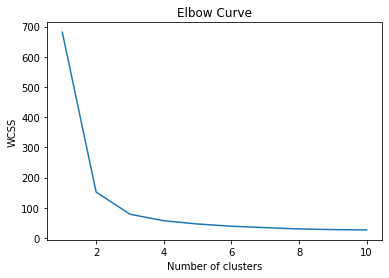

In [11]:
x=df.iloc[:,0:4].values

wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init="k-means++",max_iter=300, n_init=10, random_state=24)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

#Elbow Curve

plt.plot(range(1,11),wcss)
plt.title("Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

Optimun value of clusters is 3. We choose the no. of clusters as the value after which the decrease in wcss become low or almost constant in our elbow curve.

**KMeans Clustering for 3 clusters**

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 24)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


**Data Visualization**

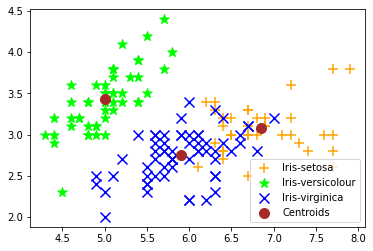

In [16]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'orange', label = 'Iris-setosa',marker="+")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'lime', label = 'Iris-versicolour',marker="*")
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'blue', label = 'Iris-virginica',marker="x")

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'brown', label = 'Centroids')

plt.legend()